# Character Segmentation
****

## Importing Dependencies

In [2]:
import cv2 
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from skimage.filters import sobel
from skimage.segmentation import watershed

## Load Handwritten Document Image

In [4]:
img = cv2.imread('dataset/Handwrttingp2.jpg', cv2.IMREAD_UNCHANGED)
img_copy = img.copy()

## Preprocessing Functions

In [5]:
def megaookele(img, blur_radius=50, epsilon=5):
    sharpen_kernel = np.array([[-1, -1, -1],
                               [-1, 10, -1],
                               [-1, -1, -1]])
    sharpen = cv2.filter2D(img, -1, sharpen_kernel)

    gray = cv2.cvtColor(sharpen, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(gray, (7, 7), blur_radius)
    # plt.figure(figsize=(20,20))
    # plt.imshow(blur, cmap='gray')

    _, threshold = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    elevation_map = sobel(threshold)
    markers = np.zeros_like(threshold)
    markers[threshold < 30] = 1
    markers[threshold > 150] = 2
    segmentation_ = watershed(elevation_map, markers)
    segmentation_noramlized = cv2.normalize(src = segmentation_, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    titles = ['OG', 'GRAY', 'BLUR', 'THRESHOLD', 'ELEVATION MAP', 'SEGMENTATION']
    images = [img, gray, blur, threshold, elevation_map, segmentation_]

    # plt.figure(figsize=(50,50))
    # for i in np.arange(len(images)):
    #     plt.subplot(3, 3, i+1)
    #     plt.imshow(images[i], 'gray')
    #     plt.title(titles[i])
    # plt.show()

    contours, hierearchy = cv2.findContours(segmentation_noramlized, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    
    contours_poly = [None] * len(contours)
    boundRect = []
    for i, c in enumerate(contours):
        if hierearchy[0][i][3] == -1:
            contours_poly[i] = cv2.approxPolyDP(c, epsilon, True)
            boundRect.append(cv2.boundingRect(contours_poly[i]))

    img_copy = img.copy()
    for i in range(len(boundRect)):
        color = (255, 0, 0)
        cv2.rectangle(img_copy, (int(boundRect[i][0]), int(boundRect[i][1])),
                     (int(boundRect[i][0] + boundRect[i][2]), int(boundRect[i][1] +boundRect[i][3])),
                     color, 1)
    
    cropped_list = []
    for i in range(len(boundRect)):
        dimension_offset = 5
        position_offset = 2
        x, y, w, h = boundRect[i]
        h = h + dimension_offset
        w = w + dimension_offset
        x = x - position_offset
        y = y - position_offset
        
        # max=0
        # for i in range(len(boundRect)):
        #     if max < boundRect[i][3]:
        #         max = boundRect[i][3]
        
        croppedImg = img[y:y+h, x:x+w]
        cropped_list.append(croppedImg)

    
   
    return cropped_list

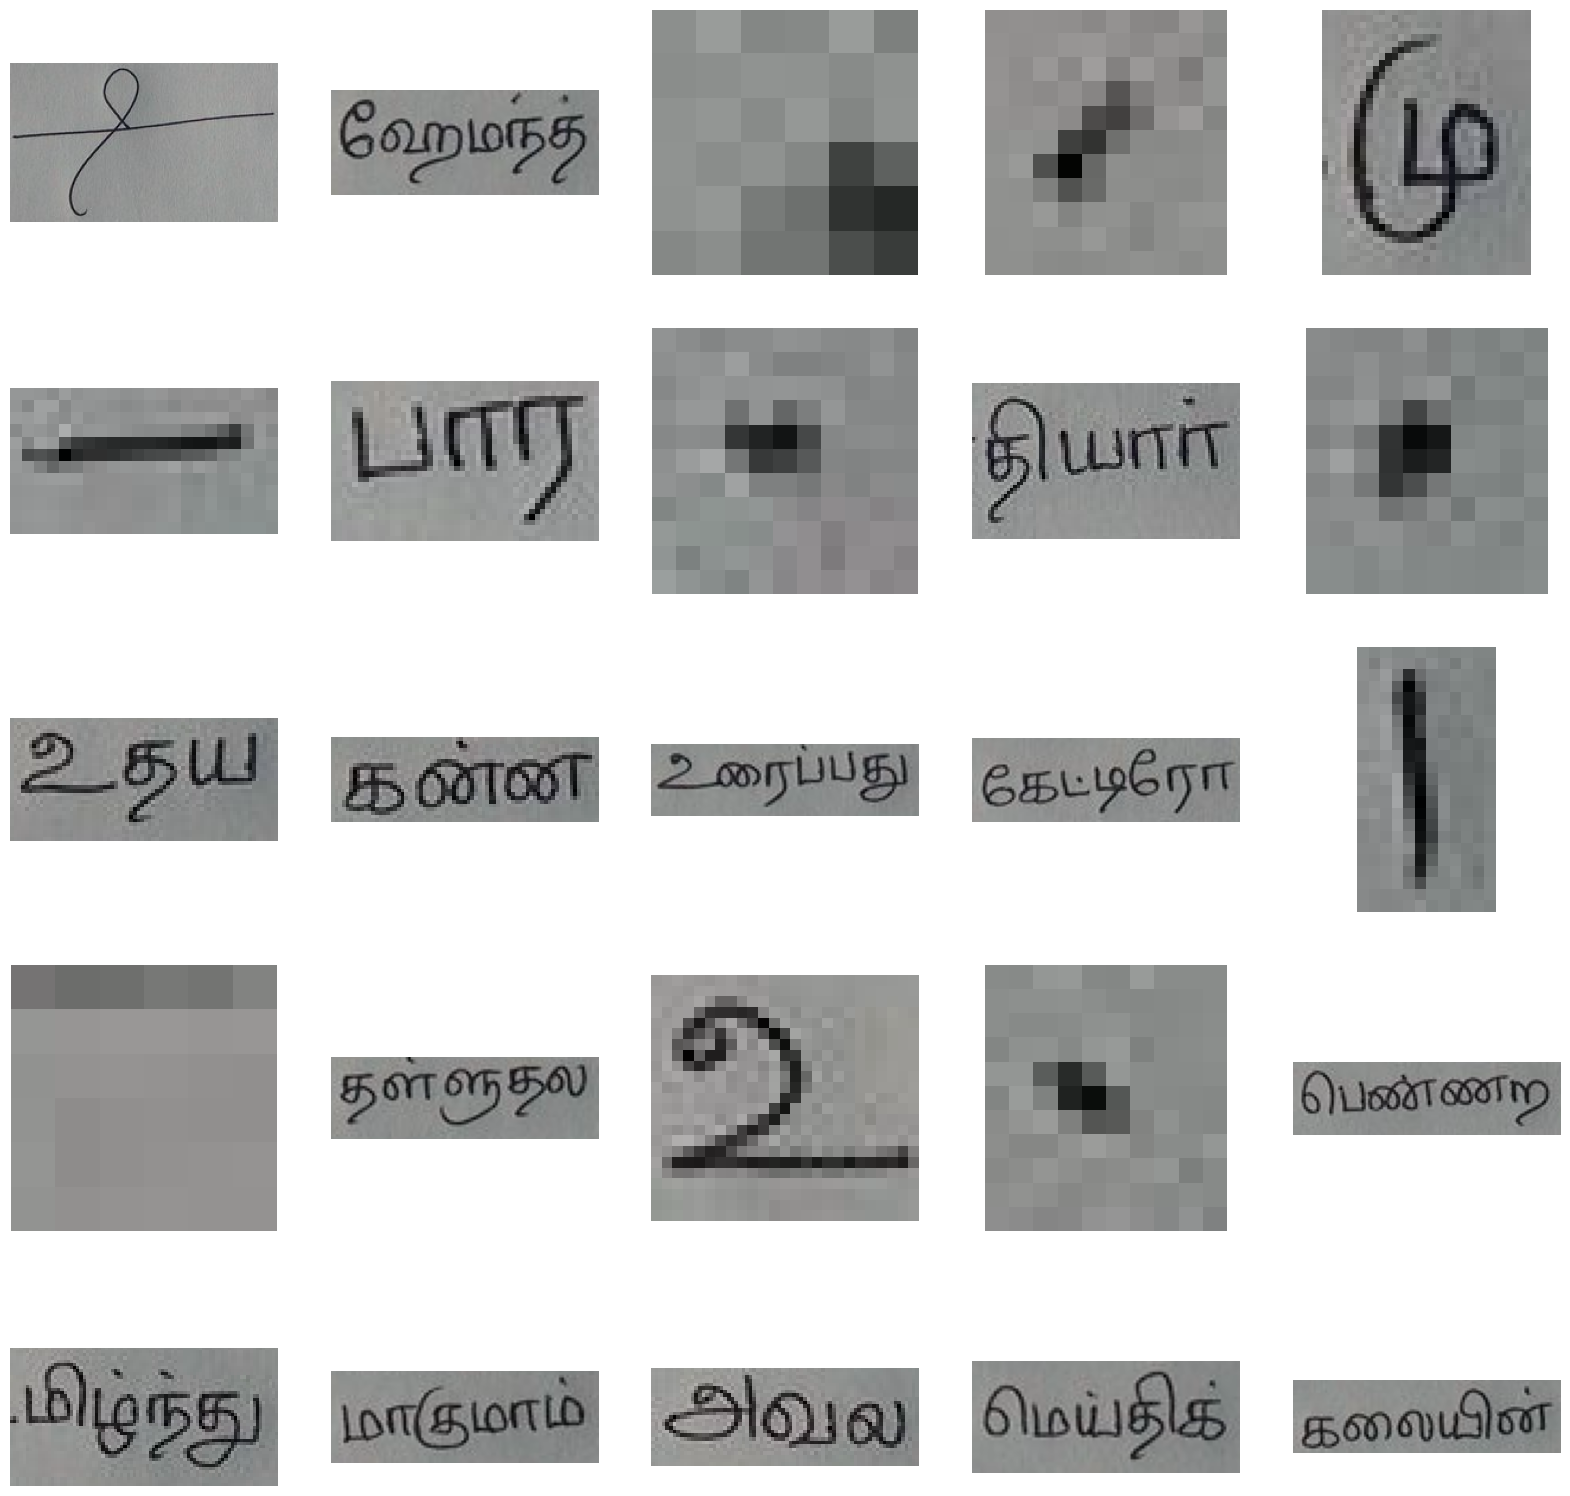

In [6]:
cropped_list = megaookele(img, 80)

plt.figure(figsize = (20, 20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(cropped_list[i], 'gray')
    plt.axis('off')

## Word Segmentation

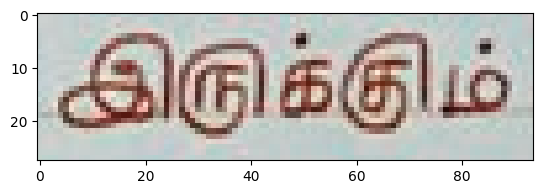

In [116]:
img = cropped_list[32]
plt.imshow(img)

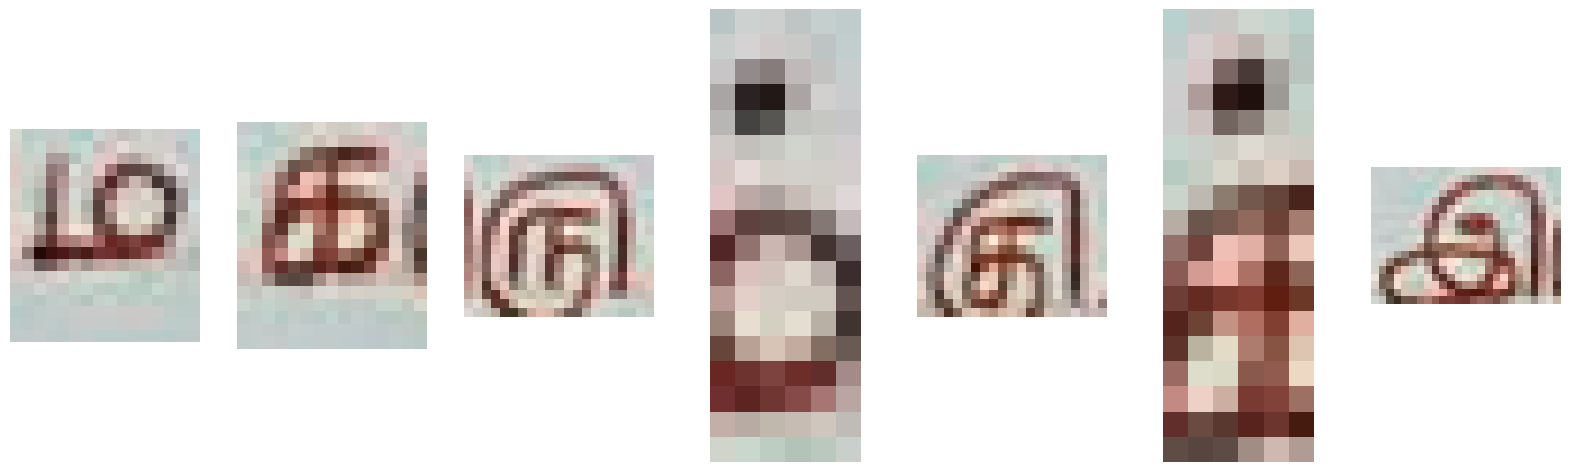

In [117]:
cropped_list2 = megaookele(cropped_list[32], 0.5, 5)

if len(cropped_list2) > 0:
    num_images = len(cropped_list2)
    num_rows = int(np.sqrt(num_images))
    num_cols = int(np.ceil(num_images / num_rows))

plt.figure(figsize = (20, 20))
for i in range(len(cropped_list2)):
    plt.subplot(3, len(cropped_list2), i+1)
    plt.imshow(cropped_list2[i], 'gray')
    plt.axis('off')

In [92]:
cropped_list2

[array([[[201, 212, 209],
         [185, 204, 201],
         [182, 205, 201],
         ...,
         [182, 211, 202],
         [177, 201, 193],
         [180, 198, 191]],
 
        [[204, 205, 201],
         [196, 205, 202],
         [195, 209, 205],
         ...,
         [206, 206, 200],
         [207, 204, 199],
         [224, 213, 209]],
 
        [[200, 207, 202],
         [197, 207, 201],
         [201, 207, 202],
         ...,
         [225, 214, 206],
         [227, 214, 206],
         [220, 188, 183]],
 
        ...,
 
        [[189, 203, 199],
         [210, 212, 212],
         [197, 199, 199],
         ...,
         [192, 205, 207],
         [191, 201, 201],
         [210, 214, 215]],
 
        [[196, 217, 214],
         [202, 207, 208],
         [206, 208, 209],
         ...,
         [208, 206, 205],
         [201, 202, 198],
         [197, 207, 201]],
 
        [[192, 213, 211],
         [201, 211, 211],
         [202, 206, 207],
         ...,
         [206, 201, 198],
  